# Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Exploratory Data Analysis

In [ ]:
# Read in the data
data = pd.read_csv(r"amazon_alexa.tsv", delimiter = '\t', quoting = 3)
print(f"Dataset shape : {data.shape}")

Dataset shape : (3150, 5)


In [ ]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
data.tail()

,rating,date,variation,verified_reviews,feedback
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1
3149,4,29-Jul-18,Black Dot,Good,1


In [ ]:
# Column names

print(f"Feature names : {data.columns.values}")

Feature names : ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [ ]:
# Check for null values

data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [ ]:
# Getting the record where 'verified_reviews' is null

data[data['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [ ]:
# Drop the null record

data.dropna(inplace=True)

In [ ]:
print(f"Dataset shape after dropping null values : {data.shape}")

Dataset shape after dropping null values : (3149, 5)


In [ ]:
# Creating a new column 'length' that will contain the length of the string in 'verified_reviews' column

data['length'] = data['verified_reviews'].apply(len)

In [ ]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [ ]:
# Randomly checking for 10th record

print(f"'verified_reviews' column value: {data.iloc[10]['verified_reviews']}") #Original value
print(f"Length of review : {len(data.iloc[10]['verified_reviews'])}") #Length of review using len()
print(f"'length' column value : {data.iloc[10]['length']}") #Value of the column 'length'

'verified_reviews' column value: "I sent it to my 85 year old Dad, and he talks to it constantly."
Length of review : 65
'length' column value : 65


In [ ]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

## Analyzing 'rating' column

In [ ]:
len(data)

3149

In [ ]:
# Distinct values of 'rating' and its count

print(f"Rating value count: \n{data['rating'].value_counts()}")

Rating value count: 
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


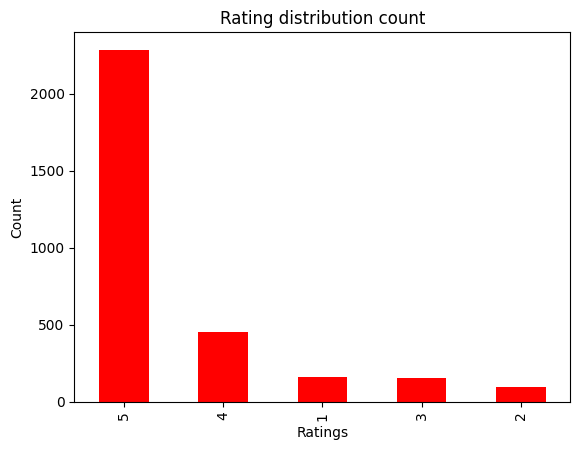

In [ ]:
# Bar plot to visualize the total counts of each rating

data['rating'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [ ]:
# Finding the percentage distribution of each rating

print(f"Rating value count - percentage distribution: \n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")

Rating value count - percentage distribution: 
rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


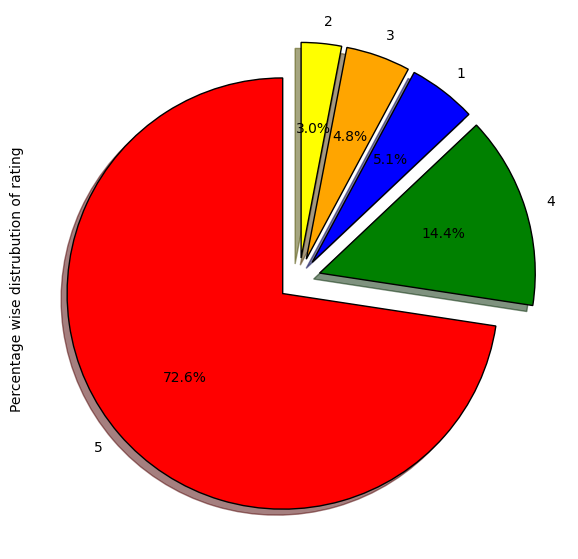

In [ ]:
# Ploting it using pie chart

fig = plt.figure(figsize=(7,7))

colors = ('red', 'green', 'blue','orange','yellow')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['rating'].value_counts()/data.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

## Analyzing 'feedback' column

In [ ]:
# Distinct values of 'feedback' and its count

print(f"Feedback value count: \n{data['feedback'].value_counts()}")

Feedback value count: 
feedback
1    2893
0     256
Name: count, dtype: int64


In [ ]:
# Extracting the 'verified_reviews' value for one record with feedback = 0

review_0 = data[data['feedback'] == 0].iloc[1]['verified_reviews']
print(review_0)

Sound is terrible if u want good music too get a bose


In [ ]:
# Extracting the 'verified_reviews' value for one record with feedback = 1

review_1 = data[data['feedback'] == 1].iloc[1]['verified_reviews']
print(review_1)

Loved it!


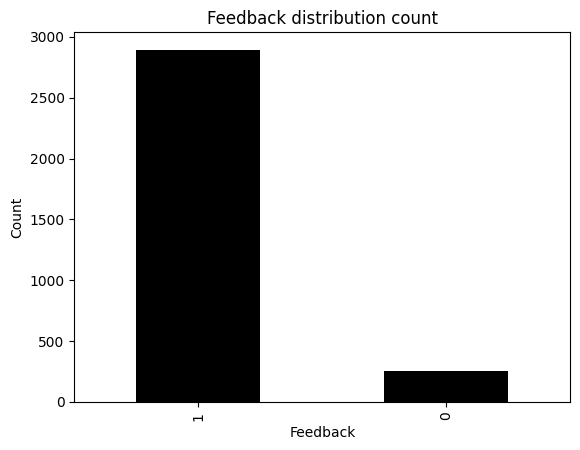

In [ ]:
# Bar graph to visualize the total counts of each feedback

data['feedback'].value_counts().plot.bar(color = 'black')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [ ]:
# Finding the percentage distribution of each feedback

print(f"Feedback value count - percentage distribution: \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

Feedback value count - percentage distribution: 
feedback
1    91.87
0     8.13
Name: count, dtype: float64


<Axes: ylabel='Percentage wise distrubution of feedback'>

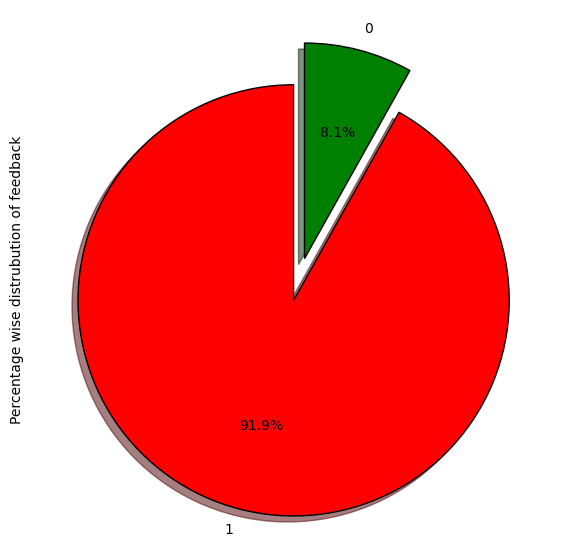

In [ ]:
# Plotting the pie chart for the deeback

fig = plt.figure(figsize=(7,7))

colors = ('red', 'green')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['feedback'].value_counts()/data.shape[0]

explode=(0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of feedback')

#### 'rating' values for different values of 'feedback'

In [ ]:
# Feedback = 0

data[data['feedback'] == 0]['rating'].value_counts()


rating
1    161
2     95
Name: count, dtype: int64

In [ ]:
# Feedback = 1

data[data['feedback'] == 1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

## Analyzing 'variation' column

In [ ]:
# Distinct values of 'variation' and its count

print(f"Variation value count: \n{data['variation'].value_counts()}")

Variation value count: 
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


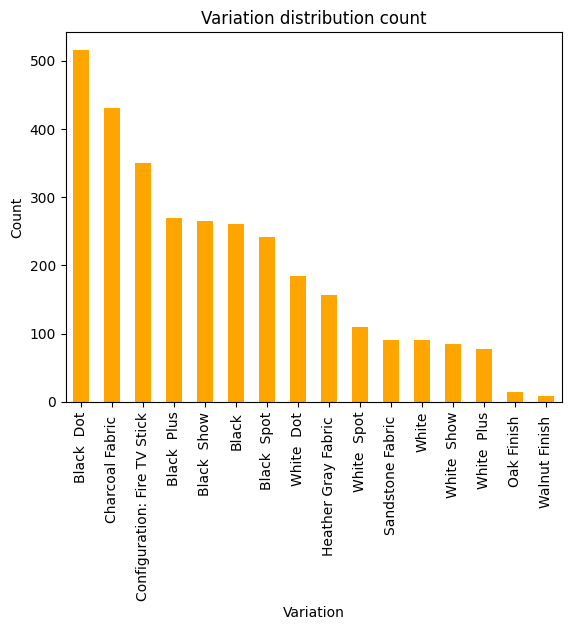

In [ ]:
# Bar graph to visualize the total counts of each variation

data['variation'].value_counts().plot.bar(color = 'orange')
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [ ]:
#Finding the percentage distribution of each variation

print(f"Variation value count - percentage distribution: \n{round(data['variation'].value_counts()/data.shape[0]*100,2)}")

Variation value count - percentage distribution: 
variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


In [ ]:
# Mean rating as per the variation

data.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

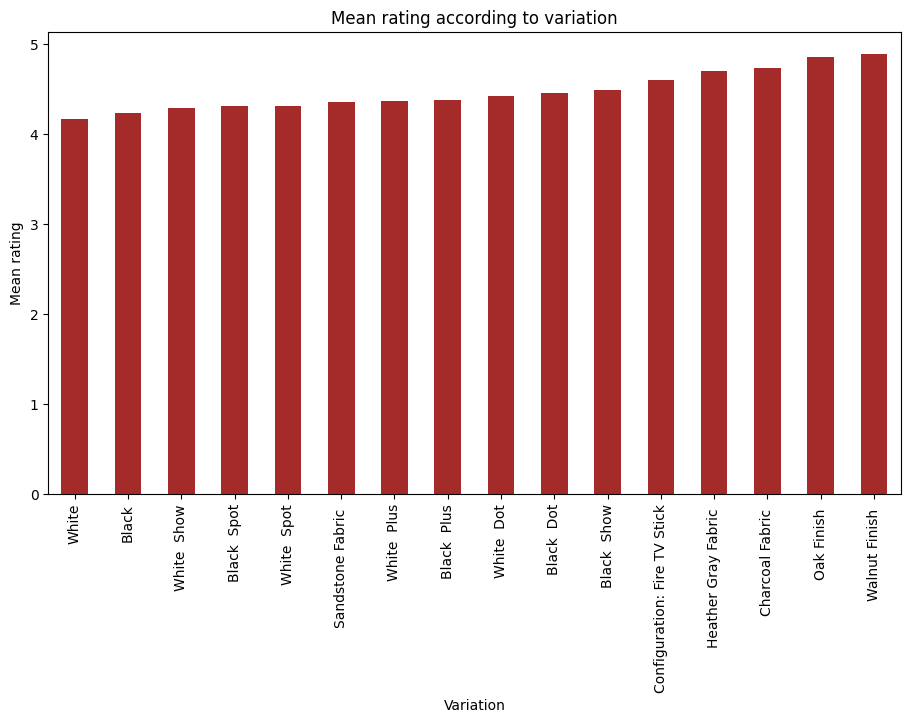

In [ ]:
# Plotting the mean ratings

data.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

## Analyzing 'verified_reviews' column

In [ ]:
data['length'].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

[Text(0.5, 1.0, 'Distribution of length of review ')]

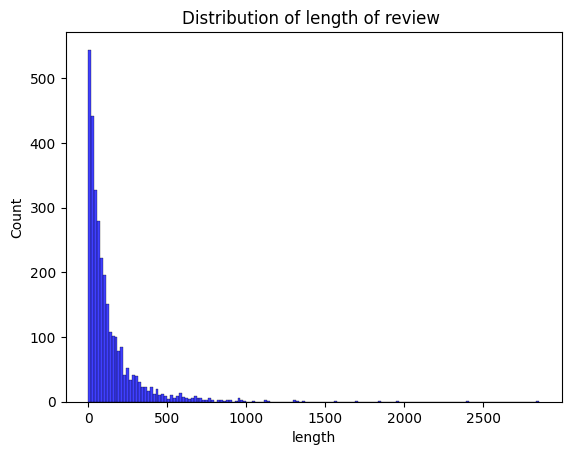

In [ ]:
# Length of reviews of the whole dataset

sns.histplot(data['length'],color='blue').set(title='Distribution of length of review ')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

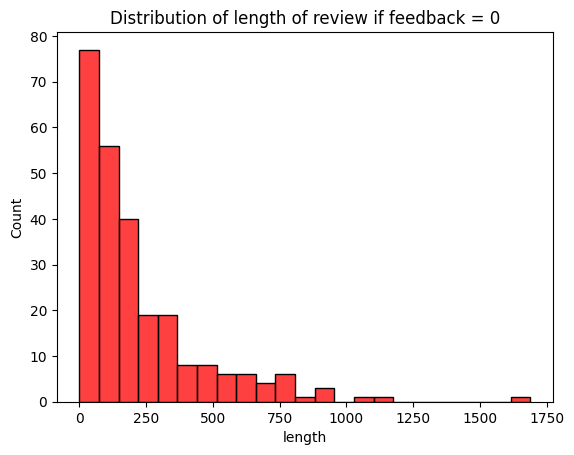

In [ ]:
# Length of negative reviews

sns.histplot(data[data['feedback']==0]['length'],color='red').set(title='Distribution of length of review if feedback = 0')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

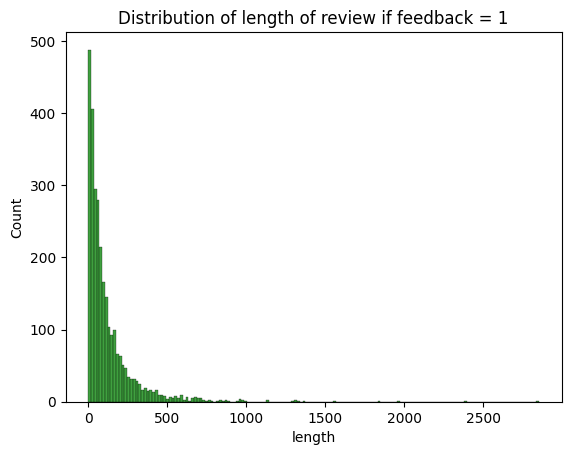

In [ ]:
# Length of positive reviews

sns.histplot(data[data['feedback']==1]['length'],color='green').set(title='Distribution of length of review if feedback = 1')

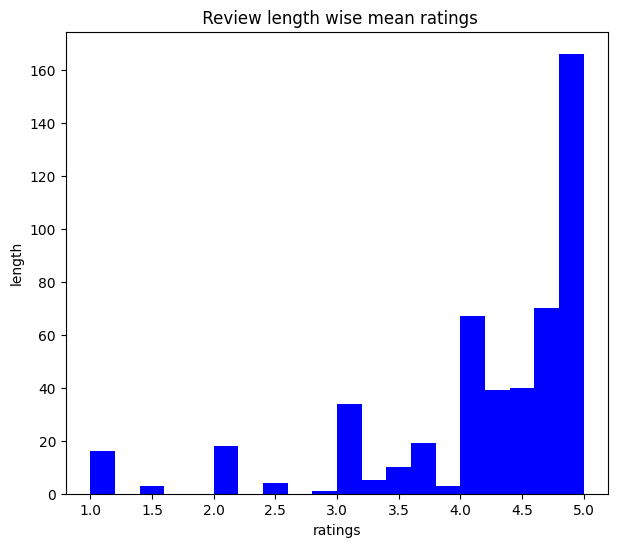

In [ ]:
# Lengthwise mean ratings

data.groupby('length')['rating'].mean().plot.hist(color = 'blue', figsize=(7, 6), bins = 20)
plt.title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()

## Wordcloud of the reviews

In [ ]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.verified_reviews)

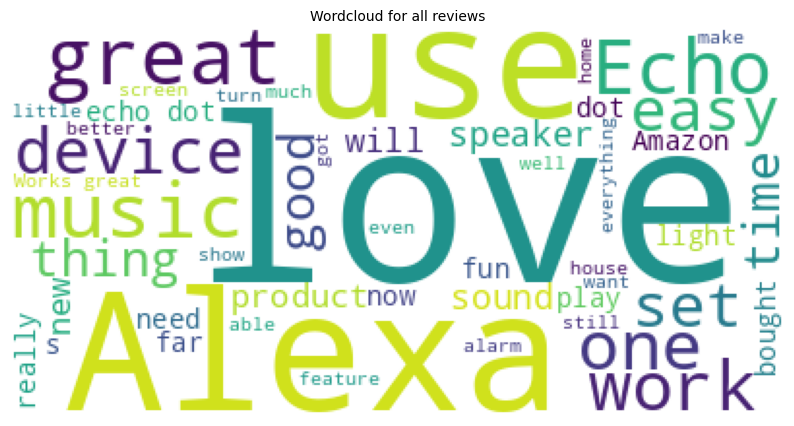

In [ ]:
# Combine all reviews
reviews = " ".join([review for review in data['verified_reviews']])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [ ]:
# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in data[data['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in data[data['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

# Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

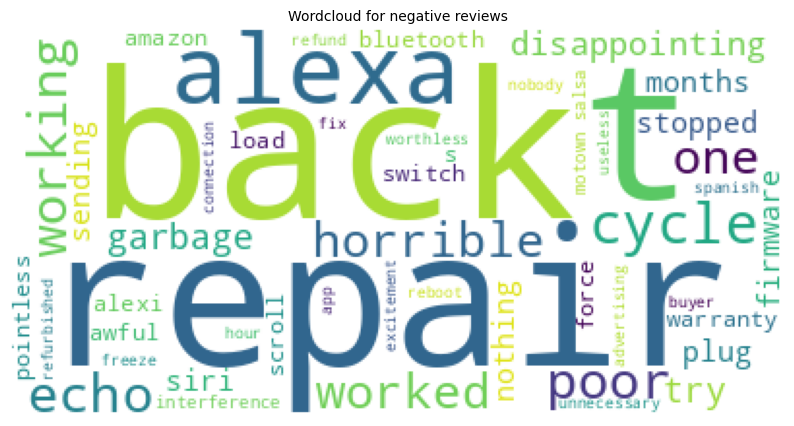

In [ ]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

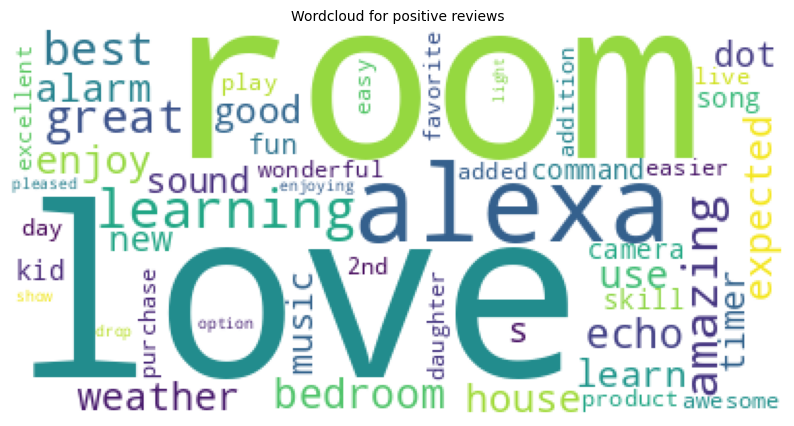

In [ ]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

# Sentiment Analysis using Textblob

In [ ]:
from textblob import TextBlob

def analyze_sentiment(text):
    # Create a TextBlob object
    blob = TextBlob(text)

    # Calculate subjectivity and polarity
    subjectivity = blob.subjectivity
    polarity = blob.polarity

    # Classify sentiment based on polarity score
    if polarity < 0:
        sentiment = 'Negative'
    elif polarity == 0:
        sentiment = 'Neutral'
    else:
        sentiment = 'Positive'

    # Return subjectivity, polarity, and sentiment score
    return subjectivity, polarity, sentiment

text = "I love this product! It's amazing."
subjectivity, polarity, sentiment = analyze_sentiment(text)
print("Subjectivity:", subjectivity)
print("Polarity:", polarity)
print("Sentiment:", sentiment)

Subjectivity: 0.75
Polarity: 0.6125
Sentiment: Positive


In [ ]:
alexa_reviews_df = pd.read_csv('/content/amazon_alexa.tsv', sep='\t')

In [ ]:
# Check the data type of the verified_reviews column
print(alexa_reviews_df['verified_reviews'].dtype)

# Print the first few values of the verified_reviews column
print(alexa_reviews_df['verified_reviews'].head())

object
0                                        Love my Echo!
1                                            Loved it!
2    Sometimes while playing a game, you can answer...
3    I have had a lot of fun with this thing. My 4 ...
4                                                Music
Name: verified_reviews, dtype: object


In [ ]:
alexa_reviews_df['verified_reviews'] = alexa_reviews_df['verified_reviews'].astype(str)

In [ ]:
# Apply sentiment analysis function to each review
alexa_reviews_df['Subjectivity'], alexa_reviews_df['Polarity'], alexa_reviews_df['Sentiment'] = zip(*alexa_reviews_df['verified_reviews'].apply(analyze_sentiment))

# Print the first few rows of the dataset with sentiment analysis results
print(alexa_reviews_df.head())

   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  Subjectivity  \
0                                      Love my Echo!         1        0.6000   
1                                          Loved it!         1        0.8000   
2  Sometimes while playing a game, you can answer...         1        0.5125   
3  I have had a lot of fun with this thing. My 4 ...         1        0.4500   
4                                              Music         1        0.0000   

   Polarity Sentiment  
0     0.625  Positive  
1     0.875  Positive  
2    -0.100  Negative  
3     0.350  Positive  
4     0.000   Neutral  


## Sentiments analysis over time

<ipython-input-52-afbc11b1a6dc>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  alexa_reviews_df['date'] = pd.to_datetime(alexa_reviews_df['date'])


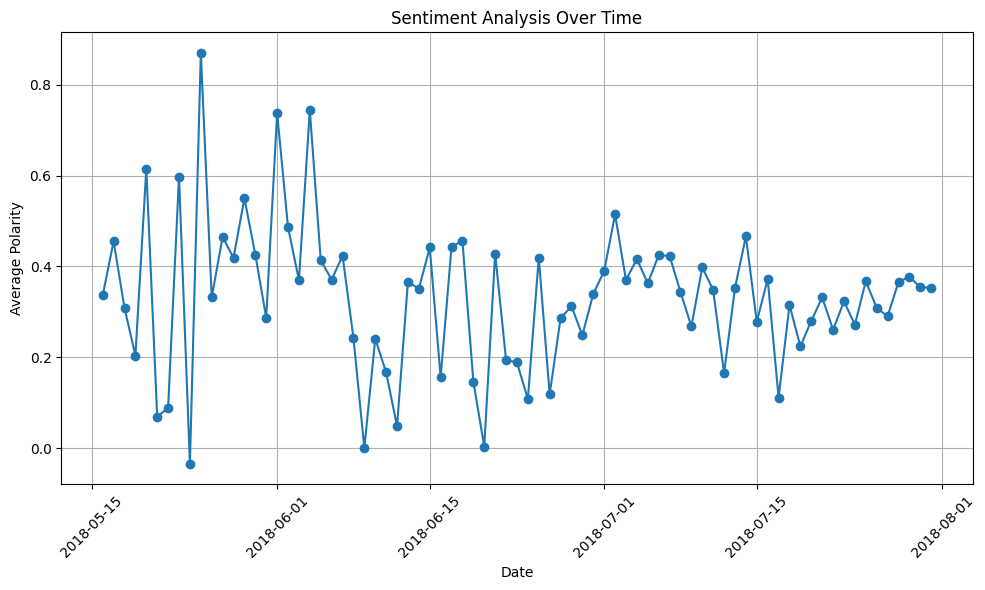

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'date' column to datetime format
alexa_reviews_df['date'] = pd.to_datetime(alexa_reviews_df['date'])

# Group by date and calculate average polarity
average_sentiment_by_date = alexa_reviews_df.groupby('date')['Polarity'].mean()

# Plot sentiment scores over time
plt.figure(figsize=(10, 6))
plt.plot(average_sentiment_by_date.index, average_sentiment_by_date.values, marker='o', linestyle='-')
plt.title('Sentiment Analysis Over Time')
plt.xlabel('Date')
plt.ylabel('Average Polarity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

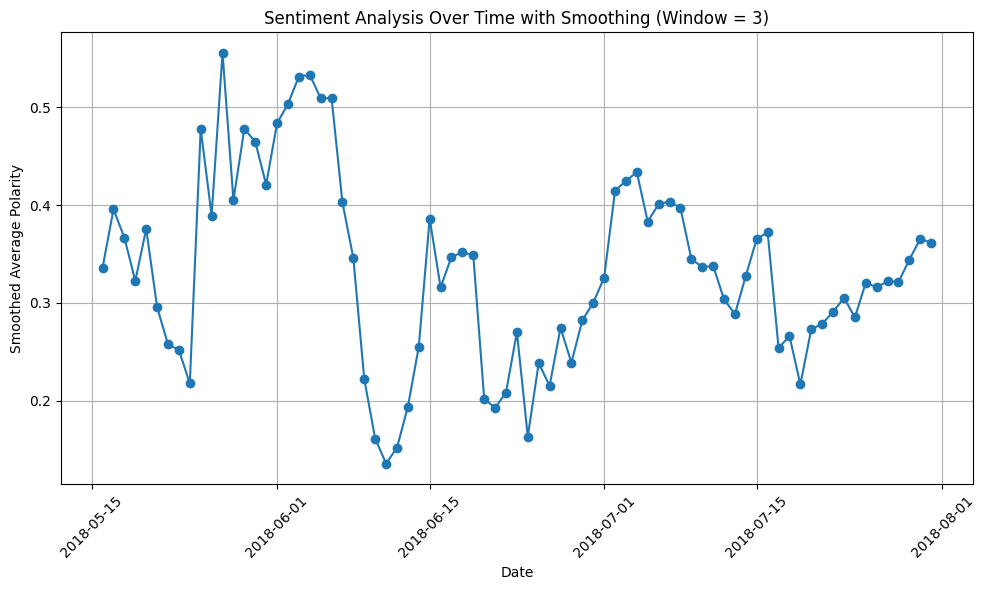

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'date' column to datetime format
alexa_reviews_df['date'] = pd.to_datetime(alexa_reviews_df['date'])

# Group by date and calculate polarity for each review
sentiment_by_date = alexa_reviews_df.groupby('date')['Polarity'].mean()

# Apply smoothing with a window of 3 to the raw sentiment scores
smoothed_sentiment = sentiment_by_date.rolling(window=3, min_periods=1).mean()

# Plot smoothed sentiment scores over time
plt.figure(figsize=(10, 6))
plt.plot(smoothed_sentiment.index, smoothed_sentiment.values, marker='o', linestyle='-')
plt.title('Sentiment Analysis Over Time with Smoothing (Window = 3)')
plt.xlabel('Date')
plt.ylabel('Smoothed Average Polarity')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

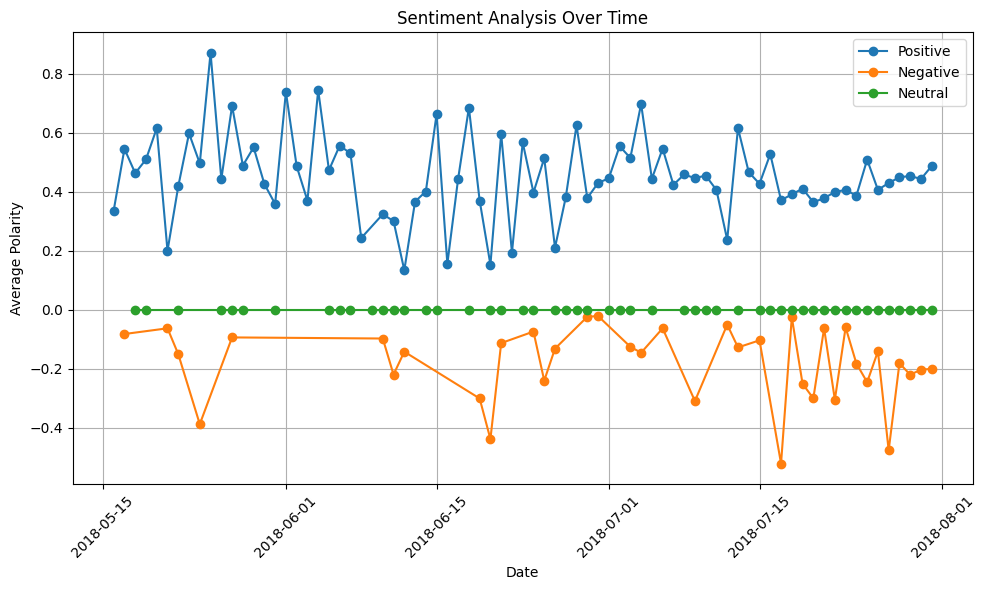

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have the 'alexa_reviews_df' DataFrame with sentiment analysis results

# Convert 'date' column to datetime format
alexa_reviews_df['date'] = pd.to_datetime(alexa_reviews_df['date'])

# Create separate DataFrames for positive, negative, and neutral sentiments
positive_sentiments_df = alexa_reviews_df[alexa_reviews_df['Sentiment'] == 'Positive']
negative_sentiments_df = alexa_reviews_df[alexa_reviews_df['Sentiment'] == 'Negative']
neutral_sentiments_df = alexa_reviews_df[alexa_reviews_df['Sentiment'] == 'Neutral']

# Group by date and calculate average polarity for each sentiment
average_positive_sentiment_by_date = positive_sentiments_df.groupby('date')['Polarity'].mean()
average_negative_sentiment_by_date = negative_sentiments_df.groupby('date')['Polarity'].mean()
average_neutral_sentiment_by_date = neutral_sentiments_df.groupby('date')['Polarity'].mean()

# Apply smoothing with a window of 3
smoothed_sentiment = average_sentiment_by_date.rolling(window=3, min_periods=1).mean()

# Plot sentiment scores over time on the same graph
plt.figure(figsize=(10, 6))
plt.plot(average_positive_sentiment_by_date.index, average_positive_sentiment_by_date.values, label='Positive', marker='o', linestyle='-')
plt.plot(average_negative_sentiment_by_date.index, average_negative_sentiment_by_date.values, label='Negative', marker='o', linestyle='-')
plt.plot(average_neutral_sentiment_by_date.index, average_neutral_sentiment_by_date.values, label='Neutral', marker='o', linestyle='-')

plt.title('Sentiment Analysis Over Time')
plt.xlabel('Date')
plt.ylabel('Average Polarity')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Download NLTK resources (if not already downloaded)
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Concatenate all reviews into a single string
all_reviews_text = ' '.join(data['verified_reviews'])

# Tokenize the text
tokens = word_tokenize(all_reviews_text)

# Lowercase the tokens
tokens = [token.lower() for token in tokens]

# Remove punctuation and stopwords
stop_words = set(stopwords.words('english'))
tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]

# Count word frequencies
word_freq = Counter(tokens)

# Get the most common keywords
num_keywords = 10  # Number of top keywords to display
top_keywords = word_freq.most_common(num_keywords)

# Print the top keywords
print("Top Keywords Discussed in Reviews:")
for keyword, freq in top_keywords:
    print(f"{keyword}: {freq}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top Keywords Discussed in Reviews:
love: 951
echo: 826
great: 717
alexa: 594
music: 524
like: 501
use: 465
works: 378
one: 343
easy: 337


In [ ]:
import pandas as pd

# Group by ratings and calculate average polarity for each rating
average_sentiment_by_rating = alexa_reviews_df.groupby('rating')['Polarity'].mean()

# Print the average sentiment scores for each rating
print("Average Sentiment by Ratings:")
print(average_sentiment_by_rating)


Average Sentiment by Ratings:
rating
1   -0.010489
2    0.030747
3    0.127992
4    0.277505
5    0.417691
Name: Polarity, dtype: float64
